<a href="https://colab.research.google.com/github/doinkenny/DH100-MusicGenres/blob/main/musicgenres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries and mount drive**

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

clientID = 'f1ff50c440cb4d0ab2c0621699bbad15'
secretID = '7819dcbd6c6a40c0a1b9c248ead43438'
client_credentials_manager = SpotifyClientCredentials(client_id=clientID, client_secret=secretID)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


**Load datasets into pandas dataframe**

In [3]:
tracks = pd.read_csv('/content/drive/My Drive/tracks.csv')
genreTracks = pd.read_csv('/content/drive/My Drive/songDb.tsv', sep='\t', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Create a list of all the genres in genreTracks with no repeats**

In [4]:
genres = genreTracks.Genre
uniqGenres = []
for genre in genres:
  if genre not in uniqGenres:
    uniqGenres.append(genre)

print(uniqGenres)
print(len(uniqGenres))


['celticmetal', 'balkantrap', 'slovakrock', 'deepchill-out', 'ghanaianhiphop', 'e6fi', 'ostrock', 'slovakindie', 'persiantraditional', 'albanianhiphop', 'modernblues', 'canadianpop', 'portuguesefolk', 'belgianpop', 'runefolk', 'psychill', 'deepcomedy', 'lapop', 'balletclass', 'khmer', 'groovemetal', 'pianoblues', nan, 'dronemetal', 'dreampop', 'swedishindiepop', 'undergroundpowerpop', 'sungpoetry', 'mexicanrock-and-roll', 'minimaldub', 'belgianmetal', 'raregroove', 'newrave', 'japanesedeathmetal', 'arabichiphop', 'italianbaroque', 'gothicmetal', 'worship', 'undergroundlatinhiphop', 'norwegianmetal', 'dronefolk', 'zeuhl', 'oratory', 'mathpop', 'romanianfolk', 'sinhala', 'deeplatinjazz', 'alternativeamericana', 'birminghamindie', 'bostonmetal', 'go-go', 'tropicalhouse', 'spanishfolk', 'russianpunk', 'canadianrock', 'country', 'liverpoolindie', 'gabba', 'substep', 'mandepop', 'doo-wop', 'darktechno', 'salsa', 'deepbrazilianpop', 'thaipop', 'torontoindie', 'messianicpraise', 'blues-rock', 

**Create genreEnergyVariances, which will be a dictionary mapping each individual genre to the variance of every track within than genre.**

In [5]:
from collections import defaultdict
genreEnergies = defaultdict(list) #dictionary mapping each genre to a list of energy values of all its tracks
genreEnergyVariances = dict.fromkeys(uniqGenres) #dictionary mapping each genre to its energy variance()
print(genreEnergies)
#https://stackoverflow.com/questions/26367812/appending-to-list-in-python-dictionary


for index, track in genreTracks.iterrows():
  genreEnergies[track['Genre']].append(track['Energy'])

for genre, energies in genreEnergies.items():
  genreEnergyVariances[genre] = np.var(energies)

print(genreEnergyVariances)


defaultdict(<class 'list'>, {})
{'celticmetal': 0.05558333524345309, 'balkantrap': 0.01834484339292634, 'slovakrock': 0.019438618651892885, 'deepchill-out': 0.04444832154876786, 'ghanaianhiphop': 0.008219289256198352, 'e6fi': 0.035713148773017546, 'ostrock': 0.03080178592129102, 'slovakindie': 0.02079263100591716, 'persiantraditional': 0.04871297353929453, 'albanianhiphop': 0.015852214170193807, 'modernblues': 0.04081372851103595, 'canadianpop': 0.029536596555323938, 'portuguesefolk': 0.04995407086161088, 'belgianpop': 0.040303834232141664, 'runefolk': 0.045486320573869504, 'psychill': 0.029688058501972772, 'deepcomedy': 0.03732956321002563, 'lapop': 0.02493660243709869, 'balletclass': 0.01319472736364437, 'khmer': 0.034660497719986035, 'groovemetal': 0.011813008188528701, 'pianoblues': 0.046520761904191535, nan: 11.013313609467454, 'dronemetal': 0.0562069474661314, 'dreampop': 0.07391312494541978, 'swedishindiepop': 0.044037174924407535, 'undergroundpowerpop': 0.03976624586415816, 'su

**Show the top 10 genres with most amount of variance in energy levels and the top 10 genres with the least amount of variance in energy levels.**

In [6]:
sortedEnergies = sorted(genreEnergyVariances.items(), key=lambda x: x[1], reverse=True)
print(sortedEnergies)

[(nan, 11.013313609467454), ('celtic', 0.13187125306148192), ('deepsoundtrack', 0.11181263899867744), ('irishclassical', 0.10764566753689442), ('classify', 0.10671841286846238), ('orchestralperformance', 0.09708642687806122), ('musicaperbambini', 0.09662767885788752), ('americanchoir', 0.08979519673173471), ('polishfolk', 0.0892885), ('turkishexperimental', 0.08686478500422655), ('irishfolk', 0.08330893759992494), ('finnishfolk', 0.08309075538547006), ('classicsoundtrack', 0.08184340690609594), ('videogamemusic', 0.0793565514352455), ('spanishfolk', 0.07703200970121801), ('renaissance', 0.07535289180344766), ('vintageradioshow', 0.07403217470617285), ('dreampop', 0.07391312494541978), ('reading', 0.07290210919979577), ('steampunk', 0.07070035746492272), ('microtonal', 0.06889815204994798), ('animescore', 0.06845697481820988), ('mallet', 0.06791353280457142), ('organicambient', 0.06679277118985648), ('italianoccultpsychedelia', 0.06538363164930555), ('deepsmoothjazz', 0.0636997233509380

# **Top 10 Energy Variance Genres**

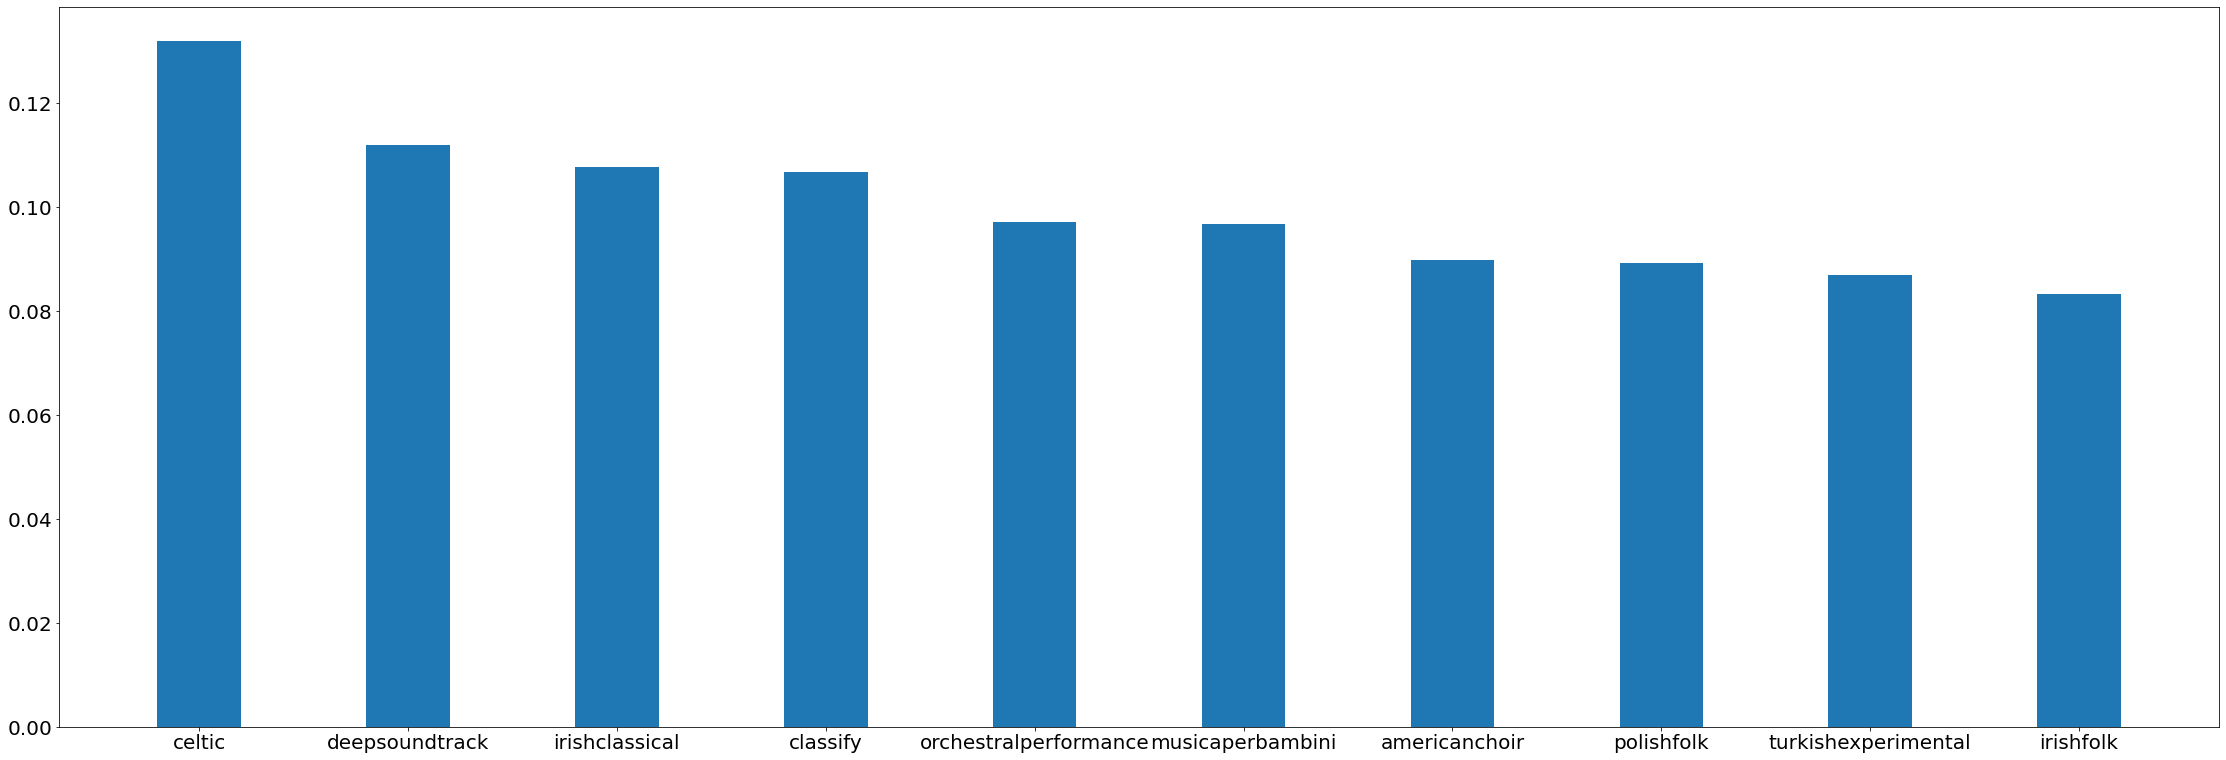

In [10]:
top10genres = []
top10vals = []
for i in range(1, 11):
  top10genres.append(sortedEnergies[i][0])
  top10vals.append(sortedEnergies[i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(top10genres,top10vals, width=0.4)
plt.rcParams['font.size'] = 20
plt.show()

# **Top 10 Least Energy Variance Genres**

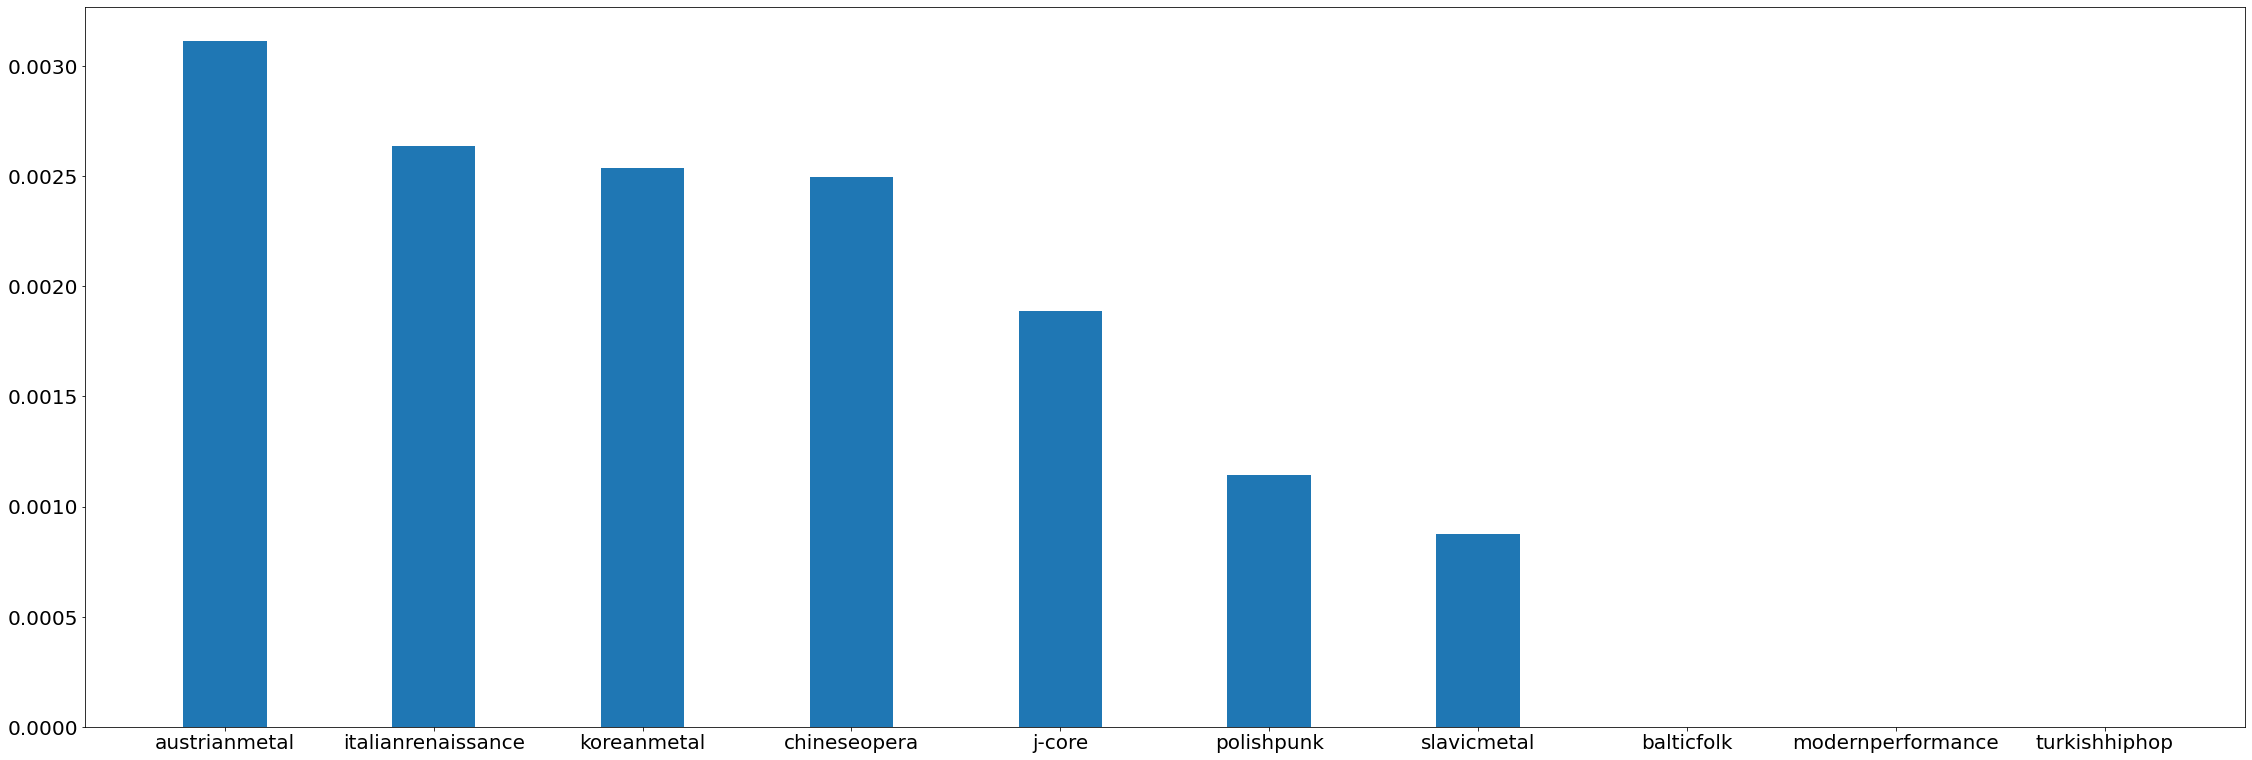

In [11]:
bot10genres = []
bot10vals = []
length = len(sortedEnergies) - 1
for i in reversed(range(10)):
  bot10genres.append(sortedEnergies[length - i][0])
  bot10vals.append(sortedEnergies[length - i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(bot10genres,bot10vals, width=0.4)
plt.rcParams['font.size'] = 20
plt.show()

# **Analyzing the Energy Variance Data**
The energy values in the Spotify API are calculated through a mixture of the track's BPM, loudness, intensity, and activity. The three genres that presented the most variability in energy were Celtic, Deep Soundtrack, and Irish Classical. The three genres that present the least variability in energy were Turkish Hip-Hop, Modern Performance, and Baltic Folk.

We will now take a closer look at some distributions of individual genres that presented a large amount of variability and those with a tiny amount of variability. These genres were chosen as they are able to be easily defined and explained to a common listener. Some of the more obscure genres that Spotify presents don't have a clear definition and were thus left out of this closer analysis.

**Orchestral Performance**

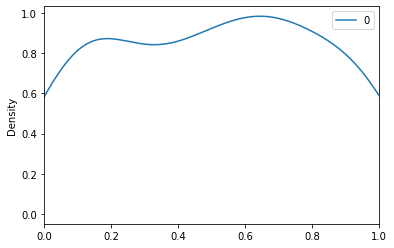

In [ ]:
orchestral = pd.DataFrame(genreEnergies['orchestralperformance'])
orchestral.plot(kind='density')
plt.xlim([0,1])
plt.show()

**American Choir**

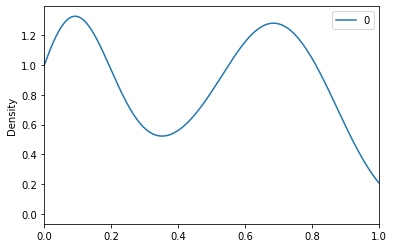

In [ ]:
choir = pd.DataFrame(genreEnergies['americanchoir'])
choir.plot(kind='density')
plt.xlim([0,1])
plt.show()

**Videogame Music**

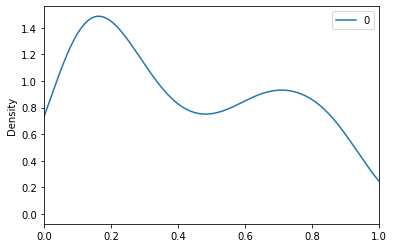

In [ ]:
vgm = pd.DataFrame(genreEnergies['videogamemusic'])
vgm.plot(kind='density')
plt.xlim([0,1])
plt.show()

**Slavic Metal**

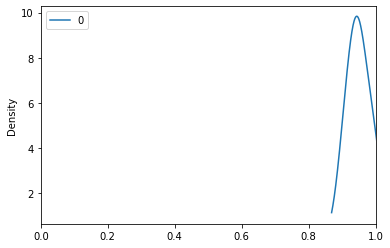

In [ ]:
slavicmetal = pd.DataFrame(genreEnergies['slavicmetal'])
slavicmetal.plot(kind='density')
plt.xlim([0, 1])
plt.show()

**J-Core**

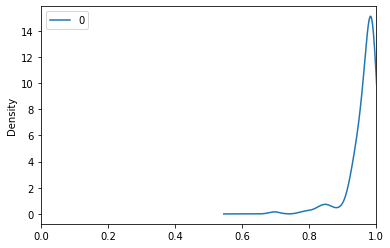

In [ ]:
jcore = pd.DataFrame(genreEnergies['j-core'])
jcore.plot(kind='density')
plt.xlim([0,1])
plt.show()

**Chinese Opera**

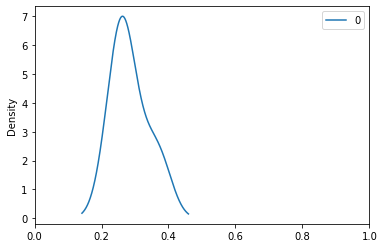

In [ ]:
copera = pd.DataFrame(genreEnergies['chineseopera'])
copera.plot(kind='density')
plt.xlim([0,1])
plt.show()

"Characterized by soft singing and minimal musical accompaniment — typically only a drum or clapper and a bamboo flute" https://www.historymuseum.ca/cantoneseopera/hist-e.shtml